Humans are quite predictible. The tech giants know this and are able to map your daily journey times, your daily coffee habits and commute preferences to get recommendations on your phone. This project is giving your a slight taste of that.

Here we use 4 square checkins, which are user generated checkins across new york and tokyo, to understand user mobilility. In this project, you have been given user ids, and their checkin patterns with checkin location and category of business. Using this , model a user’s journey as some form of a process that takes into account past N checkins and predicts the N+1th checkin. Leverage the knowledge from class to understand if there is any clustering phenomenon around certain types of busineses.

The dataset is found here : https://www.kaggle.com/chetanism/foursquare-nyc-and-tokyo-checkin-dataset. More so a simple characterization of the dataset would be very helpful in putting confidence in your observations. Comment on any interesting anomalies in terms of characteristics of data.



10-20 page report of your project (submit as PDF on keats).

Code - In the first page of your report, provide a link to an online repository (repo) of your source code (You can use, for example, github.com, bitbucket.org or any other version control solution). We do not require the data but feel free to include in your repo if allowed by the dataset’s terms and conditions.


program: python
data: https://www.kaggle.com/chetanism/foursquare-nyc-and-tokyo-checkin-dataset


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
NYC = pd.read_csv('../data/dataset_TSMC2014_NYC.csv')
TKY = pd.read_csv('../data/dataset_TSMC2014_TKY.csv')

## Basic Data Analysis

In [4]:
NYC[:5]

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012


In [5]:
NYC.describe()

,userId,latitude,longitude,timezoneOffset
count,227428.000000,227428.000000,227428.000000,227428.000000
mean,535.304817,40.754045,-73.974556,-253.392019
std,305.398774,0.072458,0.086209,43.234750
min,1.000000,40.550852,-74.274766,-420.000000
25%,287.000000,40.718330,-74.000633,-240.000000
50%,523.000000,40.747745,-73.983479,-240.000000
75%,793.000000,40.778374,-73.945709,-240.000000
max,1083.000000,40.988332,-73.683825,660.000000


We can see that the number of users is very large, and the number of users is much smaller than the number of samples, which means that a single user has multiple records.

In [6]:
NYC[NYC['userId']==470]

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
626,470,4e08ad8cd4c03ae0b9d11f93,4bf58dd8d48988d1d2941735,Sushi Restaurant,40.683178,-73.965746,-240,Tue Apr 03 23:36:34 +0000 2012
650,470,4be09b7fcb81c9b62069668b,4bf58dd8d48988d1d2941735,Sushi Restaurant,40.624513,-73.965070,-240,Tue Apr 03 23:46:46 +0000 2012
652,470,49f50c9ff964a5208a6b1fe3,4bf58dd8d48988d1d2941735,Sushi Restaurant,40.677611,-73.963748,-240,Tue Apr 03 23:47:16 +0000 2012
654,470,4a6a09b1f964a52071cc1fe3,4bf58dd8d48988d1d2941735,Sushi Restaurant,40.702752,-73.990696,-240,Tue Apr 03 23:47:49 +0000 2012
655,470,49e63b62f964a52027641fe3,4bf58dd8d48988d1d2941735,Sushi Restaurant,40.687583,-73.989895,-240,Tue Apr 03 23:48:15 +0000 2012
660,470,45795395f964a520d23e1fe3,4bf58dd8d48988d1d2941735,Sushi Restaurant,40.679694,-73.974252,-240,Tue Apr 03 23:48:51 +0000 2012
674,470,4c9d89017ada199cf0a493bc,4bf58dd8d48988d111941735,Japanese Restaurant,40.705436,-74.008348,-240,Tue Apr 03 23:51:33 +0000 2012
677,470,4b5b92def964a5201d0829e3,4bf58dd8d48988d1d2941735,Sushi Restaurant,40.599278,-73.990891,-240,Tue Apr 03 23:52:01 +0000 2012
678,470,4baea553f964a5206dca3be3,4bf58dd8d48988d1d2941735,Sushi Restaurant,40.657351,-73.956644,-240,Tue Apr 03 23:52:25 +0000 2012


Looking at this user with a user id of 470, we find that his travel is more regular and goes to the same place every day, so we can consider starting from the date.
Extract the corresponding time series features, such as the day of the week, morning or afternoon, etc. (the reference source for this feature has been analyzed in the R language code)

In [7]:
TKY[:5]

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
0,1541,4f0fd5a8e4b03856eeb6c8cb,4bf58dd8d48988d10c951735,Cosmetics Shop,35.705101,139.619590,540,Tue Apr 03 18:17:18 +0000 2012
1,868,4b7b884ff964a5207d662fe3,4bf58dd8d48988d1d1941735,Ramen / Noodle House,35.715581,139.800317,540,Tue Apr 03 18:22:04 +0000 2012
2,114,4c16fdda96040f477cc473a5,4d954b0ea243a5684a65b473,Convenience Store,35.714542,139.480065,540,Tue Apr 03 19:12:07 +0000 2012
3,868,4c178638c2dfc928651ea869,4bf58dd8d48988d118951735,Food & Drink Shop,35.725592,139.776633,540,Tue Apr 03 19:12:13 +0000 2012
4,1458,4f568309e4b071452e447afe,4f2a210c4b9023bd5841ed28,Housing Development,35.656083,139.734046,540,Tue Apr 03 19:18:23 +0000 2012


In [54]:
TKY.describe()

,userId,latitude,longitude,timezoneOffset
count,573703.000000,573703.000000,573703.000000,573703.000000
mean,1123.907593,35.676370,139.713214,539.966742
std,658.519789,0.058958,0.074697,5.451372
min,1.000000,35.510185,139.470878,-480.000000
25%,557.000000,35.650417,139.691390,540.000000
50%,1120.000000,35.685867,139.719274,540.000000
75%,1681.000000,35.704023,139.767101,540.000000
max,2293.000000,35.867150,139.912593,600.000000


The same data for New York and Japan is basically the same, and the same analysis method can be used.

## Advanced Data Analysis

In [51]:
statistics = NYC.groupby(by=['userId','venueCategory']).count()

In [95]:
statistics = statistics.reset_index()
user_1 = statistics[statistics['userId']==1][['venueCategory','venueCategoryId']]
user_2 = statistics[statistics['userId']==2][['venueCategory','venueCategoryId']]
user_3 = statistics[statistics['userId']==3][['venueCategory','venueCategoryId']]
user_1 = user_1.rename(columns={'venueCategoryId':'count'})
user_2 = user_2.rename(columns={'venueCategoryId':'count'})
user_3 = user_3.rename(columns={'venueCategoryId':'count'})

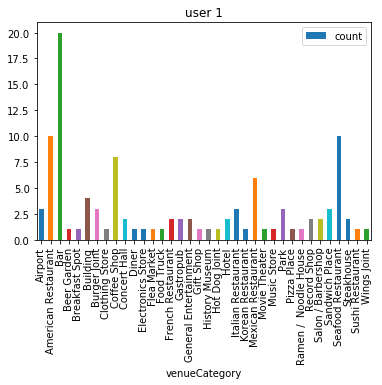

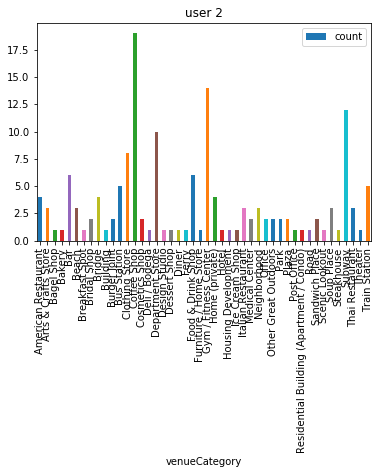

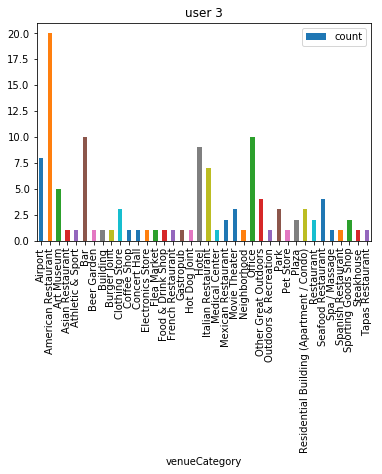

In [96]:
user_1.plot.bar(x='venueCategory',y='count',title='user 1')
user_2.plot.bar(x='venueCategory',y='count',title='user 2')
user_3.plot.bar(x='venueCategory',y='count',title='user 3')

It can be seen that different users may access multiple target locations, but the frequency of access in some locations is very high. From here we can extract some characteristics of access frequency.

# Anmorm data

In [58]:
NYC['utcTimestamp'] = pd.to_datetime(NYC['utcTimestamp'])
TKY['utcTimestamp'] = pd.to_datetime(TKY['utcTimestamp'])

In [104]:

def visual_specific_place(data,place_name):
    data = data[data['venueCategory']==place_name]
    data['date'] = data['utcTimestamp'].dt.date
    data = data[['venueCategory','date']]
    data = data.groupby(['date']).count()
    data = data.reset_index()
    data[:25].plot.bar(x='date',y='venueCategory',title=place_name)

/opt/current-env/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


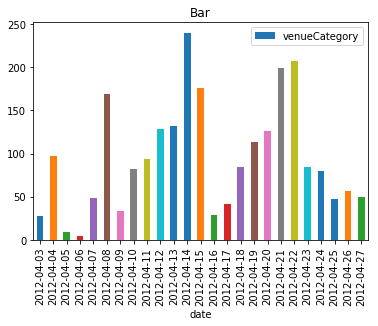

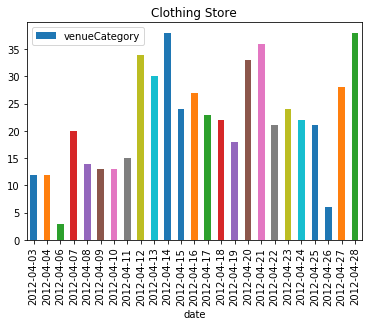

In [106]:
visual_specific_place(NYC,'Bar')
visual_specific_place(NYC,'Clothing Store')